In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
company=pd.read_csv("C:\ExcelR\Data Scientist\Decision Tree\Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.shape

(400, 11)

# EDA and Transformation

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company.drop_duplicates()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
company['ShelveLoc']=lb.fit_transform(company['ShelveLoc'])
company['Urban']=lb.fit_transform(company['Urban'])
company['US']=lb.fit_transform(company['US'])
company['Sales'] = company.Sales.map(lambda x:1 if x>8 else 0)

In [8]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


<AxesSubplot:xlabel='Sales', ylabel='count'>

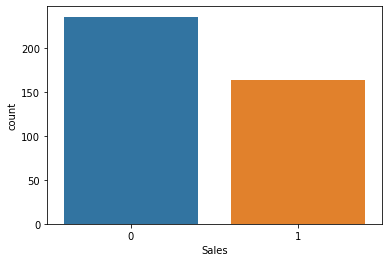

In [9]:
import seaborn as sns
sns.countplot(x='Sales',data=company)

In [10]:
array=company.values
array

array([[  1, 138,  73, ...,  17,   1,   1],
       [  1, 111,  48, ...,  10,   1,   1],
       [  1, 113,  35, ...,  12,   1,   1],
       ...,
       [  0, 162,  26, ...,  18,   1,   1],
       [  0, 100,  79, ...,  12,   1,   1],
       [  1, 134,  37, ...,  16,   1,   1]], dtype=int64)

In [11]:
X=array[:,1:11]
Y=array[:,0]

In [12]:
X

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [14]:
X_train.shape,X_test.shape

((280, 10), (120, 10))

# Building Decision Tree Classifier using Entropy Criteria

In [15]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
model.get_n_leaves()

8

In [17]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    69
1    51
dtype: int64

In [18]:
preds

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [19]:
pd.crosstab(Y_test,preds)

col_0,0,1
row_0,,
0,50,18
1,19,33


In [20]:
np.mean(preds==Y_test)

0.6916666666666667

In [21]:
print(classification_report(preds,Y_test))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        69
           1       0.63      0.65      0.64        51

    accuracy                           0.69       120
   macro avg       0.68      0.69      0.69       120
weighted avg       0.69      0.69      0.69       120



# Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [23]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
pred=model.predict(X_test)
pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [25]:
np.mean(preds==Y_test)

0.6916666666666667

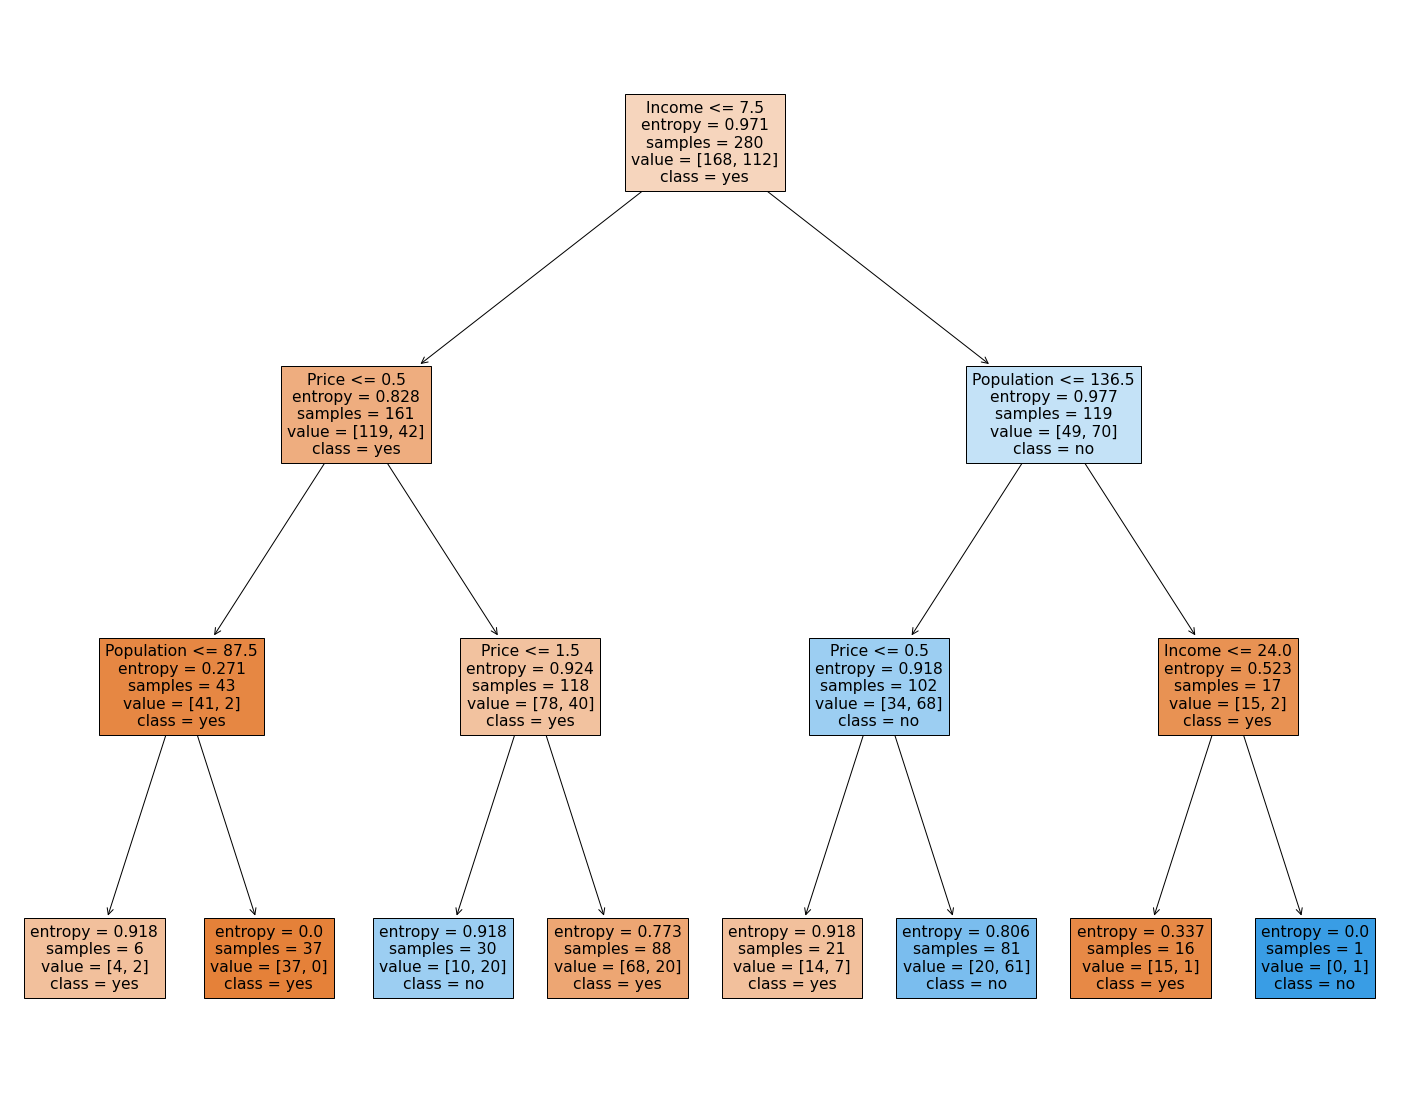

In [26]:
Company_feature=['sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
Company_class=['yes', 'no']
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model,
               feature_names = Company_feature, 
               class_names=Company_class,
               filled = True);